#Titanic - Machine Learning from Disaster

The main objective of this notebook is to create an ML model to predict whether an indivisual will survive the titanic crash based on their charcteristics. This result of the model will be submitted to the kaggle "Titanic - Machine Learning from Disaster competition".

The notebook will include multiple aspects of an ML model such as data load, data observation, data cleaning, data augmentation and updation, splitting the data, training a model and then evaluating it.

**Competition**: https://www.kaggle.com/competitions/titanic/submissions

In [ ]:
# imports
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt

##Load Data

Please drop you Kaggle Api file named "kaggle.json" in the colab workspace.

In [ ]:
!mkdir ~/.kaggle
!mv kaggle.json  ~/.kaggle

In [ ]:
!chmod 600 /root/.kaggle/kaggle.json

In [ ]:
!kaggle competitions download -c titanic

  0% 0.00/34.1k [00:00<?, ?B/s]
100% 34.1k/34.1k [00:00<00:00, 1.70MB/s]


In [ ]:
!unzip 'titanic.zip'

Archive:  titanic.zip
  inflating: gender_submission.csv   
  inflating: test.csv                
  inflating: train.csv               


In [ ]:
# load train and test data
train = pd.read_csv("train.csv")
test = pd.read_csv("test.csv")

In [ ]:
train

,PassengerId,Survived,Pclass,Name,Sex,Age,SibSp,Parch,Ticket,Fare,Cabin,Embarked
0,1,0,3,"Braund, Mr. Owen Harris",male,22.0,1,0,A/5 21171,7.2500,NaN,S
1,2,1,1,"Cumings, Mrs. John Bradley (Florence Briggs Th...",female,38.0,1,0,PC 17599,71.2833,C85,C
2,3,1,3,"Heikkinen, Miss. Laina",female,26.0,0,0,STON/O2. 3101282,7.9250,NaN,S
3,4,1,1,"Futrelle, Mrs. Jacques Heath (Lily May Peel)",female,35.0,1,0,113803,53.1000,C123,S
4,5,0,3,"Allen, Mr. William Henry",male,35.0,0,0,373450,8.0500,NaN,S
...,...,...,...,...,...,...,...,...,...,...,...,...
886,887,0,2,"Montvila, Rev. Juozas",male,27.0,0,0,211536,13.0000,NaN,S
887,888,1,1,"Graham, Miss. Margaret Edith",female,19.0,0,0,112053,30.0000,B42,S
888,889,0,3,"Johnston, Miss. Catherine Helen ""Carrie""",female,NaN,1,2,W./C. 6607,23.4500,NaN,S
889,890,1,1,"Behr, Mr. Karl Howell",male,26.0,0,0,111369,30.0000,C148,C


Useless columns: PassengerId, Name, Ticket

In [ ]:
test

,PassengerId,Pclass,Name,Sex,Age,SibSp,Parch,Ticket,Fare,Cabin,Embarked
0,892,3,"Kelly, Mr. James",male,34.5,0,0,330911,7.8292,NaN,Q
1,893,3,"Wilkes, Mrs. James (Ellen Needs)",female,47.0,1,0,363272,7.0000,NaN,S
2,894,2,"Myles, Mr. Thomas Francis",male,62.0,0,0,240276,9.6875,NaN,Q
3,895,3,"Wirz, Mr. Albert",male,27.0,0,0,315154,8.6625,NaN,S
4,896,3,"Hirvonen, Mrs. Alexander (Helga E Lindqvist)",female,22.0,1,1,3101298,12.2875,NaN,S
...,...,...,...,...,...,...,...,...,...,...,...
413,1305,3,"Spector, Mr. Woolf",male,NaN,0,0,A.5. 3236,8.0500,NaN,S
414,1306,1,"Oliva y Ocana, Dona. Fermina",female,39.0,0,0,PC 17758,108.9000,C105,C
415,1307,3,"Saether, Mr. Simon Sivertsen",male,38.5,0,0,SOTON/O.Q. 3101262,7.2500,NaN,S
416,1308,3,"Ware, Mr. Frederick",male,NaN,0,0,359309,8.0500,NaN,S


##Removing null or incomplete values

In [ ]:
train.isna().sum()

PassengerId      0
Survived         0
Pclass           0
Name             0
Sex              0
Age            177
SibSp            0
Parch            0
Ticket           0
Fare             0
Cabin          687
Embarked         2
dtype: int64

In [ ]:
test.isna().sum()

PassengerId      0
Pclass           0
Name             0
Sex              0
Age             86
SibSp            0
Parch            0
Ticket           0
Fare             1
Cabin          327
Embarked         0
dtype: int64

Normally we would have dropped all rows holding null values in training data, however the same problem persists in the test and for the submission of the competition we cannot decrease the number of rows in the test. We will have to adopt new methods to fix the null values in AGE and CABIN. However rows holding null values for embarked in training data can be dropped because no null embarked values in test data.

###1.Age

In [ ]:
print(train.Age.min())
print(train.Age.max())

0.42
80.0


Text(0.5, 1.0, 'histogram of the ages of the passengers')

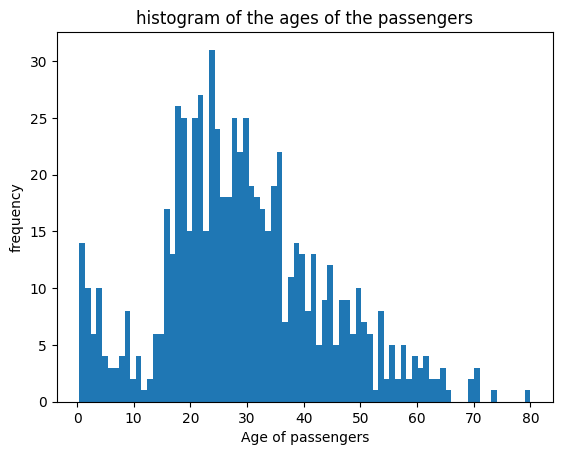

In [ ]:
# create histplot of age to see which age has the greatest count

plt.hist(train['Age'], bins=80)
plt.ylabel('frequency')
plt.xlabel('Age of passengers')
plt.title('histogram of the ages of the passengers')

Data is skewed hence its not best to use the average of all ages, instead we shuold get the 5 ages with highest count and take their average. 

In [ ]:
hist, bin_edges = np.histogram(train.Age.dropna(), bins=80, density=False)

print(f"frequensies: {hist}\n") # array of densities
print(f"Bin edges: {bin_edges}\n") # array of bin_edges

frequensies: [14 10  6 10  4  3  3  4  8  2  4  1  2  6  6 17 13 26 25 15 25 27 15 31
 24 18 18 25 22 25 19 18 17 15 19 22  7 11 14 13  8 13  5  9 12  5  9  9
  6 10  7  6  1  8  2  5  2  5  2  4  3  4  2  2  3  1  0  0  0  2  3  0
  0  1  0  0  0  0  0  1]

Bin edges: [ 0.42     1.41475  2.4095   3.40425  4.399    5.39375  6.3885   7.38325
  8.378    9.37275 10.3675  11.36225 12.357   13.35175 14.3465  15.34125
 16.336   17.33075 18.3255  19.32025 20.315   21.30975 22.3045  23.29925
 24.294   25.28875 26.2835  27.27825 28.273   29.26775 30.2625  31.25725
 32.252   33.24675 34.2415  35.23625 36.231   37.22575 38.2205  39.21525
 40.21    41.20475 42.1995  43.19425 44.189   45.18375 46.1785  47.17325
 48.168   49.16275 50.1575  51.15225 52.147   53.14175 54.1365  55.13125
 56.126   57.12075 58.1155  59.11025 60.105   61.09975 62.0945  63.08925
 64.084   65.07875 66.0735  67.06825 68.063   69.05775 70.0525  71.04725
 72.042   73.03675 74.0315  75.02625 76.021   77.01575 78.0105  79.00525


In [ ]:
# get the five ages where the count was highest

# Getting indices of N = 5 maximum values
x = np.argsort(hist)[::-1][:5]
print("Indices:",x)

# Getting N maximum values
print("age:",bin_edges[x])

Indices: [23 21 17 27 18]
age: [23.29925 21.30975 17.33075 27.27825 18.3255 ]


In [ ]:
int(np.average(bin_edges[x]))

21

21 is the best value to fill all the null values with.

In [ ]:
train.Age.describe()

count    714.000000
mean      29.699118
std       14.526497
min        0.420000
25%       20.125000
50%       28.000000
75%       38.000000
max       80.000000
Name: Age, dtype: float64

In [ ]:
train1 = train

train1.Age = train1.Age.fillna(21)

In [ ]:
# fill all null values of age with 21
test1 = test

test1.Age = test1.Age.fillna(21)

In [ ]:
# convert the age column into integers
train1.Age = train1.Age.astype(int)
test1.Age = test1.Age.astype(int)

###2.Cabin

In [ ]:
train1.Pclass.value_counts()

3    491
1    216
2    184
Name: Pclass, dtype: int64

In [ ]:
train1[train.Pclass==1]

,PassengerId,Survived,Pclass,Name,Sex,Age,SibSp,Parch,Ticket,Fare,Cabin,Embarked
1,2,1,1,"Cumings, Mrs. John Bradley (Florence Briggs Th...",female,38,1,0,PC 17599,71.2833,C85,C
3,4,1,1,"Futrelle, Mrs. Jacques Heath (Lily May Peel)",female,35,1,0,113803,53.1000,C123,S
6,7,0,1,"McCarthy, Mr. Timothy J",male,54,0,0,17463,51.8625,E46,S
11,12,1,1,"Bonnell, Miss. Elizabeth",female,58,0,0,113783,26.5500,C103,S
23,24,1,1,"Sloper, Mr. William Thompson",male,28,0,0,113788,35.5000,A6,S
...,...,...,...,...,...,...,...,...,...,...,...,...
871,872,1,1,"Beckwith, Mrs. Richard Leonard (Sallie Monypeny)",female,47,1,1,11751,52.5542,D35,S
872,873,0,1,"Carlsson, Mr. Frans Olof",male,33,0,0,695,5.0000,B51 B53 B55,S
879,880,1,1,"Potter, Mrs. Thomas Jr (Lily Alexenia Wilson)",female,56,0,1,11767,83.1583,C50,C
887,888,1,1,"Graham, Miss. Margaret Edith",female,19,0,0,112053,30.0000,B42,S


In [ ]:
train1[train.Pclass==2]


,PassengerId,Survived,Pclass,Name,Sex,Age,SibSp,Parch,Ticket,Fare,Cabin,Embarked
9,10,1,2,"Nasser, Mrs. Nicholas (Adele Achem)",female,14,1,0,237736,30.0708,NaN,C
15,16,1,2,"Hewlett, Mrs. (Mary D Kingcome)",female,55,0,0,248706,16.0000,NaN,S
17,18,1,2,"Williams, Mr. Charles Eugene",male,21,0,0,244373,13.0000,NaN,S
20,21,0,2,"Fynney, Mr. Joseph J",male,35,0,0,239865,26.0000,NaN,S
21,22,1,2,"Beesley, Mr. Lawrence",male,34,0,0,248698,13.0000,D56,S
...,...,...,...,...,...,...,...,...,...,...,...,...
866,867,1,2,"Duran y More, Miss. Asuncion",female,27,1,0,SC/PARIS 2149,13.8583,NaN,C
874,875,1,2,"Abelson, Mrs. Samuel (Hannah Wizosky)",female,28,1,0,P/PP 3381,24.0000,NaN,C
880,881,1,2,"Shelley, Mrs. William (Imanita Parrish Hall)",female,25,0,1,230433,26.0000,NaN,S
883,884,0,2,"Banfield, Mr. Frederick James",male,28,0,0,C.A./SOTON 34068,10.5000,NaN,S


In [ ]:
train1[train.Pclass==3]

,PassengerId,Survived,Pclass,Name,Sex,Age,SibSp,Parch,Ticket,Fare,Cabin,Embarked
0,1,0,3,"Braund, Mr. Owen Harris",male,22,1,0,A/5 21171,7.2500,NaN,S
2,3,1,3,"Heikkinen, Miss. Laina",female,26,0,0,STON/O2. 3101282,7.9250,NaN,S
4,5,0,3,"Allen, Mr. William Henry",male,35,0,0,373450,8.0500,NaN,S
5,6,0,3,"Moran, Mr. James",male,21,0,0,330877,8.4583,NaN,Q
7,8,0,3,"Palsson, Master. Gosta Leonard",male,2,3,1,349909,21.0750,NaN,S
...,...,...,...,...,...,...,...,...,...,...,...,...
882,883,0,3,"Dahlberg, Miss. Gerda Ulrika",female,22,0,0,7552,10.5167,NaN,S
884,885,0,3,"Sutehall, Mr. Henry Jr",male,25,0,0,SOTON/OQ 392076,7.0500,NaN,S
885,886,0,3,"Rice, Mrs. William (Margaret Norton)",female,39,0,5,382652,29.1250,NaN,Q
888,889,0,3,"Johnston, Miss. Catherine Helen ""Carrie""",female,21,1,2,W./C. 6607,23.4500,NaN,S


The Cabin column doesn make any sense, thefore it is okay to drop the column from both train and test data

In [ ]:
train2 = train1.drop(['Cabin'], axis=1)
test2 = test1.drop(['Cabin'], axis=1)

In [ ]:
train2.dropna(subset = ['Embarked'], inplace=True)

##Remove unnecessary columns

In [ ]:
train2

,PassengerId,Survived,Pclass,Name,Sex,Age,SibSp,Parch,Ticket,Fare,Embarked
0,1,0,3,"Braund, Mr. Owen Harris",male,22,1,0,A/5 21171,7.2500,S
1,2,1,1,"Cumings, Mrs. John Bradley (Florence Briggs Th...",female,38,1,0,PC 17599,71.2833,C
2,3,1,3,"Heikkinen, Miss. Laina",female,26,0,0,STON/O2. 3101282,7.9250,S
3,4,1,1,"Futrelle, Mrs. Jacques Heath (Lily May Peel)",female,35,1,0,113803,53.1000,S
4,5,0,3,"Allen, Mr. William Henry",male,35,0,0,373450,8.0500,S
...,...,...,...,...,...,...,...,...,...,...,...
886,887,0,2,"Montvila, Rev. Juozas",male,27,0,0,211536,13.0000,S
887,888,1,1,"Graham, Miss. Margaret Edith",female,19,0,0,112053,30.0000,S
888,889,0,3,"Johnston, Miss. Catherine Helen ""Carrie""",female,21,1,2,W./C. 6607,23.4500,S
889,890,1,1,"Behr, Mr. Karl Howell",male,26,0,0,111369,30.0000,C


In [ ]:
train2.Embarked.unique()

array(['S', 'C', 'Q'], dtype=object)

In [ ]:
# drop unnecesaary columns in train and test set

obsolete_columns = ['PassengerId', 'Name', 'Ticket']


train3 = train2.drop(obsolete_columns, axis=1)
test3 = test2.drop(obsolete_columns, axis=1)

In [ ]:
test_passenger = test2.PassengerId

##Data Visualization

In [ ]:
train3.groupby(['Sex', 'Survived']).size().unstack()

Survived,0,1
Sex,,
female,81,231
male,468,109


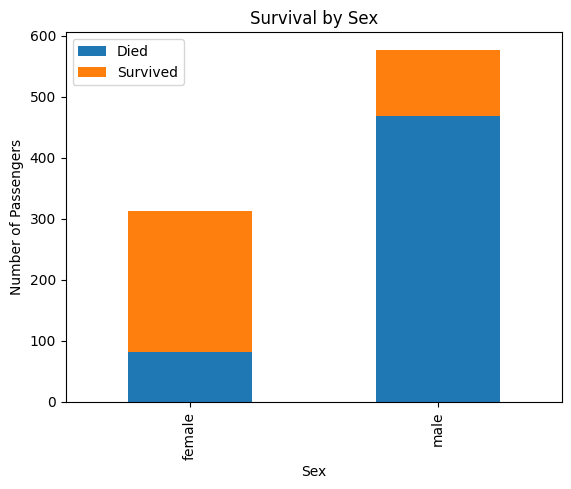

In [ ]:
# bar chart of how many male and how many females sruvived

# Group the data by sex and survival status, and count the number of passengers in each group
grouped = train3.groupby(['Sex', 'Survived']).size().unstack()

# Create a bar chart of the grouped data
grouped.plot(kind='bar', stacked=True)

# Add labels and a title to the chart
plt.xlabel('Sex')
plt.ylabel('Number of Passengers')
plt.title('Survival by Sex')
plt.legend(['Died', 'Survived'])
plt.show()

##Encoding Categorical data

In [ ]:
train3.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 889 entries, 0 to 890
Data columns (total 8 columns):
 #   Column    Non-Null Count  Dtype  
---  ------    --------------  -----  
 0   Survived  889 non-null    int64  
 1   Pclass    889 non-null    int64  
 2   Sex       889 non-null    object 
 3   Age       889 non-null    int64  
 4   SibSp     889 non-null    int64  
 5   Parch     889 non-null    int64  
 6   Fare      889 non-null    float64
 7   Embarked  889 non-null    object 
dtypes: float64(1), int64(5), object(2)
memory usage: 62.5+ KB


Only need to encode sex and embarked

In [ ]:
from sklearn.preprocessing import OrdinalEncoder

In [ ]:
train4 = train3
test4 = test3

In [ ]:
encoder = OrdinalEncoder()
encoder.fit(train4[['Sex','Embarked']])
train4[['Sex','Embarked']] = encoder.transform(train4[['Sex','Embarked']])
test4[['Sex','Embarked']] = encoder.transform(test4[['Sex','Embarked']])

###Normalize data

In [ ]:
train4.describe()

,Survived,Pclass,Sex,Age,SibSp,Parch,Fare,Embarked
count,889.000000,889.000000,889.000000,889.000000,889.000000,889.000000,889.000000,889.000000
mean,0.382452,2.311586,0.649044,27.905512,0.524184,0.382452,32.096681,1.535433
std,0.486260,0.834700,0.477538,13.426731,1.103705,0.806761,49.697504,0.792088
min,0.000000,1.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000
25%,0.000000,2.000000,0.000000,21.000000,0.000000,0.000000,7.895800,1.000000
50%,0.000000,3.000000,1.000000,24.000000,0.000000,0.000000,14.454200,2.000000
75%,1.000000,3.000000,1.000000,35.000000,1.000000,0.000000,31.000000,2.000000
max,1.000000,3.000000,1.000000,80.000000,8.000000,6.000000,512.329200,2.000000


Age and Fare should be normalized.

In [ ]:
normalize_columns = ['Age','Fare']

In [ ]:
from sklearn.preprocessing import StandardScaler

In [ ]:
scaler = StandardScaler()
scaler.fit(train4[normalize_columns])
train4[normalize_columns] = scaler.transform(train4[normalize_columns])
test4[normalize_columns] = scaler.transform(test4[normalize_columns])

###Model

In [ ]:
test4

,Pclass,Sex,Age,SibSp,Parch,Fare,Embarked
0,3,1.0,0.454163,0,0,-0.488579,1.0
1,3,0.0,1.422925,1,0,-0.505273,2.0
2,2,1.0,2.540729,0,0,-0.451165,1.0
3,3,1.0,-0.067479,0,0,-0.471802,2.0
4,3,0.0,-0.440080,1,1,-0.398819,2.0
...,...,...,...,...,...,...,...
413,3,1.0,-0.514600,0,0,-0.484133,2.0
414,1,0.0,0.826764,0,0,1.546286,0.0
415,3,1.0,0.752243,0,0,-0.500240,2.0
416,3,1.0,-0.514600,0,0,-0.484133,2.0


In [ ]:
xtrain = train4.drop(['Survived'],axis=1)
ytrain = train4['Survived']

xtest = test4

In [ ]:
print(xtrain.shape, ytrain.shape)

(889, 7) (889,)


In [ ]:
from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import Dense

In [ ]:
model = Sequential([
    Dense(10, activation='relu', input_shape=xtrain.shape[1:]),
    Dense(28, activation='relu'),
    Dense(1, activation='sigmoid')
])

In [ ]:
model.compile(optimizer='adam', loss='binary_crossentropy', metrics=['accuracy'])

In [ ]:
history = model.fit(xtrain, ytrain, validation_split=0.1, epochs=20, batch_size=20)

Epoch 1/20
40/40 [==============================] - 1s 8ms/step - loss: 0.7142 - accuracy: 0.4863 - val_loss: 0.6630 - val_accuracy: 0.6404
Epoch 2/20
40/40 [==============================] - 0s 3ms/step - loss: 0.6481 - accuracy: 0.6450 - val_loss: 0.6161 - val_accuracy: 0.6404
Epoch 3/20
40/40 [==============================] - 0s 3ms/step - loss: 0.6246 - accuracy: 0.6525 - val_loss: 0.5943 - val_accuracy: 0.6629
Epoch 4/20
40/40 [==============================] - 0s 3ms/step - loss: 0.6091 - accuracy: 0.6575 - val_loss: 0.5737 - val_accuracy: 0.6742
Epoch 5/20
40/40 [==============================] - 0s 3ms/step - loss: 0.5946 - accuracy: 0.6762 - val_loss: 0.5580 - val_accuracy: 0.6854
Epoch 6/20
40/40 [==============================] - 0s 3ms/step - loss: 0.5813 - accuracy: 0.6963 - val_loss: 0.5413 - val_accuracy: 0.6966
Epoch 7/20
40/40 [==============================] - 0s 3ms/step - loss: 0.5675 - accuracy: 0.7013 - val_loss: 0.5229 - val_accuracy: 0.7303
Epoch 8/20
40/40 [==

In [ ]:
yhat = model.predict(xtest)

14/14 [==============================] - 0s 2ms/step


In [ ]:
yhat_binary = [0 if i<0.5 else 1 for i in yhat]

In [ ]:
len(test_passenger)

418

In [ ]:
final_excel = np.concatenate([np.reshape(np.array(test_passenger), (-1, 1)), 
                np.reshape(np.array(yhat_binary), (-1, 1))], 
                axis=1)

In [ ]:
final_excel = pd.DataFrame(final_excel, columns=['PassengerId','Survival'])

In [ ]:
final_excel.to_csv('final_excel.csv')